# FIZIKA, GIBANJE, METI, TRAJEKTORIJE

## IMPORTS

In [1]:
import numpy as np
import math as m
import pandas as pd # za poenostavljeno shranjevanje
import matplotlib.pyplot as plt
from scipy.constants import g, pi

#You'll also need to use this line to see plots in the notebook:
%matplotlib inline

print(f'gravity = {g} m/s \n', f'pi = {pi}')

gravity = 9.80665 m/s 
 pi = 3.141592653589793


# PROSTI PAD, enakomerno pospešeno gibanje

\begin{equation*}
    \begin{array}{l}

    v_0     \text{ ... začetna hitrost meta, ob času t=0} \\
    t       \text{ ... trenutni čas} \\
    \theta  \text{ ... začetni kot meta} \\
    g       \text{ ... gravitacijska konstanta} \\ 
    h_0     \text{ ... začetna višina meta} \\
    \\
    
    v(t) = g*t = \sqrt{2*h*g} \\
    h(t) = 0.5*v*t = 0.5*g*t^2 \\

    t =  \sqrt{2*h/g} \\

    \end{array}
\end{equation*}

In [2]:
# Žogo spustimo z mostu višine 10 metrov, nariši njeno hitrost v odvisnosti od časa

# vhodni podatki za izračun
dt = 0.01       # časovni korak [s]
t_total = 1*60  # celotni čas 1min = 60s

v_0 = 0           # začetna hitrost [m/s]
h_0 = 10           # začetna višina
s_0 = 0           # začetna pot

# inicializacija spremenljivk

data = np.empty((0,5))
t = 0             # trenutni čas 
a = 0             # trenutni pospešek 
v = 0             # trenutna hitrost
s = 0             # trenutna  pot
h = h_0           # trenutna višina  

# zanko poganjamo dokler ne simuliramo celotnega časa 
while t <= t_total:
    # pospešek = gravitacija = const
    a = g

    # pospešek --> hitrost
    v = a*t

    # hitrost --> pot
    s += v * dt   # pot se enakomerno povečuje

    # izračun višine
    h = h_0 - 0.5*v*t

    # podatki ene iteracije so ena vrstica vrstico
    vrstica = np.array([t, a, v, s, h])

    # vrstico dodamo k podatkom
    data = np.vstack((data, vrstica))

    # čas povečamo za dt in začnemo novo iteracijo
    t += dt

    # ko krogla doseže tla, ustavimo preračun
    if h<0:
        break

# podatke transponiramo, da lažje dostopamo do stolpcev
t_arr = data.T[0]  
a_arr = data.T[1]  
v_arr = data.T[2]  
s_arr = data.T[3]  
h_arr = data.T[4]  

# plot_pos_hit_pot(t_arr, a_arr, v_arr, s_arr)

# zadnja točka poti
print(f'--- numerični izračun ---') 
t_koncni = round(data[-1][0], 2)
a_koncni = round(data[-1][1], 2)
v_koncni = round(data[-1][2], 2)
s_koncni = round(data[-1][3], 2)
h_koncni = round(data[-1][4], 2)

print(f'končni čas = {t_koncni} s') 
print(f'končni pospešek = {a_koncni} m/s^2') 
print(f'končna hitrost = {v_koncni} m/s') 
print(f'končna pot = {s_koncni} m')
print(f'končna višina = {h_koncni} m')

print('--- teoretični izračun ---')
# s_teoreticni = v_0*t_total
# print(f'končna pot = {s_teoreticni} m')

--- numerični izračun ---
končni čas = 1.43 s
končni pospešek = 9.81 m/s^2
končna hitrost = 14.02 m/s
končna pot = 10.1 m
končna višina = -0.03 m
--- teoretični izračun ---


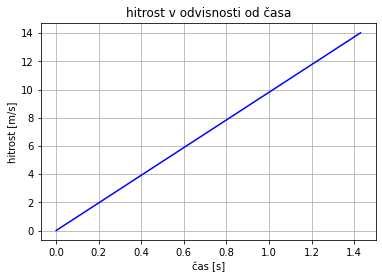

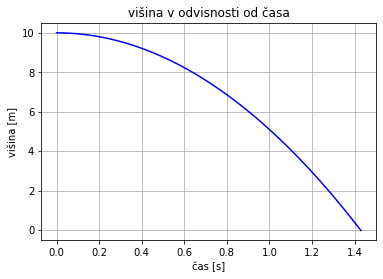

In [3]:
# Žogo spustimo z mostu višine 10 metrov, nariši njeno hitrost v odvisnosti od časa

# vhodni podatki za izračun
h_0 = 10    # višina
dt = 0.01  # update vrednosti žogice na 10 ms
t = 0       # začetni čas 0s
v = 0       # začetna hitrost

data = []   # inicializacija list, kamor bomo shranjevali podatke

# zanko poganjamo dokler predmet ne pade na tla
# zanko omejimo na n iteracij, samo varnostno
max_iterations = 1000
for i in range(max_iterations):
    # izračun hitrosti
    v = g*t
    
    # izračun višine
    h = h_0 - 0.5*v*t
    
    # vrednosti shranimo v array
    data.append([t,v,h])

    # čas povečamo za dt
    t += dt

    # ko krogla doseže tla, ustavimo preračun
    if h<0:
        break

# list pretvorimo v numpy array
data = np.array(data)
# transponiramo podatke ... vrstice postanejo stolpci
data = data.T

time = data[0]      # prvi stolpec je čas
velocity = data[1]  # drugi stolpec je hitrost
height = data[2]    # tretji stolpec je višina

# IZRIŠEMO PODATKE
plt.plot(time, velocity, 'b') # Plot for every angle
plt.title('hitrost v odvisnosti od časa')
plt.xlabel('čas [s]')
plt.ylabel('hitrost [m/s]')
plt.grid()
plt.show()

plt.plot(time, height, 'b') # Plot for every angle
plt.title('višina v odvisnosti od časa')
plt.xlabel('čas [s]')
plt.ylabel('višina [m]')
plt.grid()
plt.show()

# DODATNE NALOGE ZA PADEC ŽOGE
- kakšen je točen čas padca ?
- dodaj v kodo, da bo žogo nekdo ujel. Predvidevaj da jo ujame na 1.5 metra nad tlemi
- dodaj v kodo, da nekdo žogo vrže s hitrostjo 10 km/h, s kakšno hitrostjo bo priletela v roko, tistemu ki jo lovi. rezultat podaj v km/h.


## VODORAVNI MET brez zračnega upora

![alt text](vodoravni-met.png "Title")

\begin{equation*}
    \begin{array}{l}

    v_0     \text{ ... začetna hitrost meta, ob času t=0} \\
    t       \text{ ... trenutni čas} \\
    \theta  \text{ ... začetni kot meta} \\
    g       \text{ ... gravitacijska konstanta} \\ 
    h_0     \text{ ... začetna višina meta} \\
    \\
    x(\theta) = v_0*t \\
    y(\theta) = h_0 - 0.5*g*t^2 \\

    \end{array}
\end{equation*}

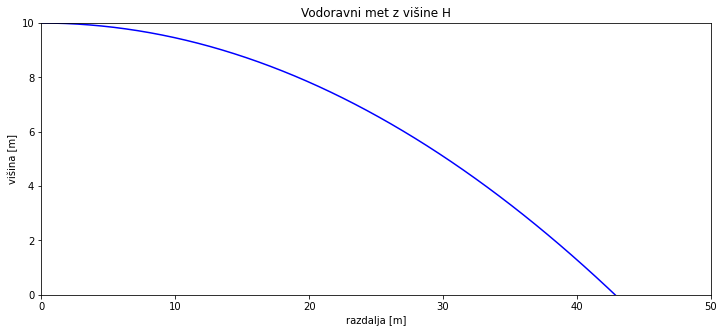

In [4]:
# začetna hitrost meta
v_0 = 30 #m/s
H = 10 # metrov

# začetni kot meta
kot_deg = 0 # degrees


# ustvarimo graf z definirano velikostjo
fig, ax = plt.subplots(figsize=(12,5))

t_array = []
x_array = []
y_array = []

for dt in np.arange(0, 5, 0.01):

    x = (v_0*dt)
    y = -((0.5*g)*(dt**2)) + H

    t_array = np.append(t_array, dt)
    x_array = np.append(x_array, x)
    y_array = np.append(y_array, y)

    # ko krogla doseže tla, ustavimo preračun
    if y<0:
        break

ax.plot(x_array, y_array, 'b') # Plot for every angle
plt.title('Vodoravni met z višine H')
# naslov osi
plt.xlabel('razdalja [m]')
plt.ylabel('višina [m]')
# dolžina prikazanih osi
plt.xlim([0,50])
plt.ylim([0,H])
# prikaži graf
plt.show()

In [5]:
# vodoravni met žoge s x in y komponento

# vhodni podatki za izračun
dt = 0.01       # časovni korak [s]
t_total = 60    # celotni čas [s]

v_0 = 0           # začetna hitrost [m/s]
h_0 = 10          # začetna višina
# s_0 = 0           # začetna pot

# inicializacija spremenljivk

# data = np.empty((0,5))
# t = 0             # trenutni čas 
# a = 0             # trenutni pospešek 
# v = 0             # trenutna hitrost
# s = 0             # trenutna  pot
# h = h_0           # trenutna višina  

vy_0 = 0
vx_0 = v_0

# zanko poganjamo dokler ne simuliramo celotnega časa 
while t <= t_total:
    # pospešek = gravitacija = const
    ax = 0
    ay = -g

    # pospešek --> hitrost
    vx = vx_0 + ax*t
    vy = vy_0 + ay*t

    # hitrost --> pozicija
    x = vx*dt
    y = -0.5*g*dt**2 + H

    # hitrost --> pot
    # s += v * dt   # pot se enakomerno povečuje

    # izračun višine
    h = h_0 - 0.5*v*t

    # podatki ene iteracije so ena vrstica vrstico
    vrstica = np.array([t, a, v, s, h])

    # vrstico dodamo k podatkom
    data = np.vstack((data, vrstica))

    # čas povečamo za dt in začnemo novo iteracijo
    t += dt

    # ko krogla doseže tla, ustavimo preračun
    if h<0:
        break

# podatke transponiramo, da lažje dostopamo do stolpcev
t_arr = data.T[0]  
a_arr = data.T[1]  
v_arr = data.T[2]  
s_arr = data.T[3]  
h_arr = data.T[4]  

# plot_pos_hit_pot(t_arr, a_arr, v_arr, s_arr)

# # zadnja točka poti
# print(f'--- numerični izračun ---') 
# t_koncni = round(data[-1][0], 2)
# a_koncni = round(data[-1][1], 2)
# v_koncni = round(data[-1][2], 2)
# s_koncni = round(data[-1][3], 2)
# h_koncni = round(data[-1][4], 2)

# print(f'končni čas = {t_koncni} s') 
# print(f'končni pospešek = {a_koncni} m/s^2') 
# print(f'končna hitrost = {v_koncni} m/s') 
# print(f'končna pot = {s_koncni} m')
# print(f'končna višina = {h_koncni} m')

# print('--- teoretični izračun ---')
# # s_teoreticni = v_0*t_total
# # print(f'končna pot = {s_teoreticni} m')

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 144 and the array at index 1 has size 5

## POŠEVNI MET BREZ UPORA

\begin{equation*}
    \begin{array}{l}
    v_0     \text{ ... začetna hitrost meta, ob času t=0} \\
    t      \text{ ... trenutni čas} \\
    \theta  \text{ ... začetni kot meta} \\
    g       \text{ ... gravitacijska konstanta} \\ 
    h_0     \text{ ... začetna višina meta} \\
    \\
    
    x(\theta) = v_0*t*cos(\theta) \\
    y(\theta) = v_0*t*sin(\theta) + h_0 - 0.5*g*t^2 \\

    \end{array}
\end{equation*}


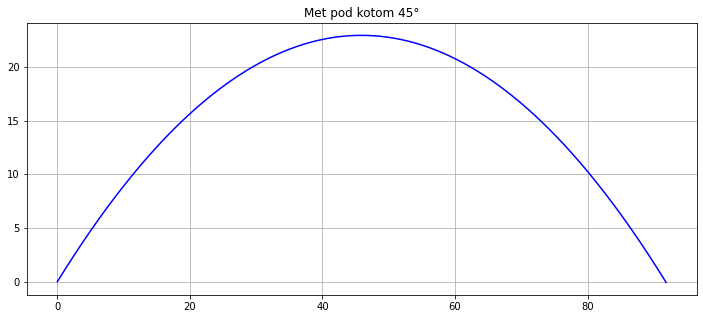

,dt,x,y
0,0.00,0.000000,0.000000
1,0.01,0.212132,0.211642
2,0.02,0.424264,0.422303
3,0.03,0.636396,0.631983
4,0.04,0.848528,0.840683
...,...,...,...
429,4.29,91.004643,0.763359
430,4.30,91.216775,0.554296
431,4.31,91.428907,0.344251
432,4.32,91.641039,0.133226


In [ ]:
# začetna hitrost meta
v_0 = 30 #m/s
# začetni kot meta
kot_deg = 45 # degrees

# ustvarimo graf z definirano velikostjo
fig, ax = plt.subplots(figsize=(12,5))

t_array = []
x_array = []
y_array = []

data = []

for dt in np.arange(0, 5, 0.01):

    kot_rad = np.deg2rad(kot_deg)

    x = ((v_0*dt)*np.cos(kot_rad))
    y = ((v_0*dt)*np.sin(kot_rad))-((0.5*g)*(dt**2))

    t_array = np.append(t_array, dt)
    x_array = np.append(x_array, x)
    y_array = np.append(y_array, y)

    row = [dt, x, y]
    # row = np.array(row)
    # print(row)
    data.append(row)
    # row = np.array([7,8,9])
    # data = np.vstack([data,row])
    # ko krogla doseže tla, ustavimo preračun
    if y<0:
        break

data = np.array(data)

ax.plot(x_array, y_array, 'b') # Plot for every angle
plt.title('Met pod kotom 45°')
plt.grid()
plt.show()

# saving data to excel
## convert your array into a pandas dataframe
column_names = ['dt','x','y']
df = pd.DataFrame(data, columns = column_names )
filepath = 'my_excel_file.xlsx'
df.to_excel(filepath, index=False)
df

Številko časovnih točk  5000
izračun trajektorij za naslednje kote meta 
 [ 5 10 15 20 25 30 35 40 45 50 55 60 65 70 75 80 85 90]


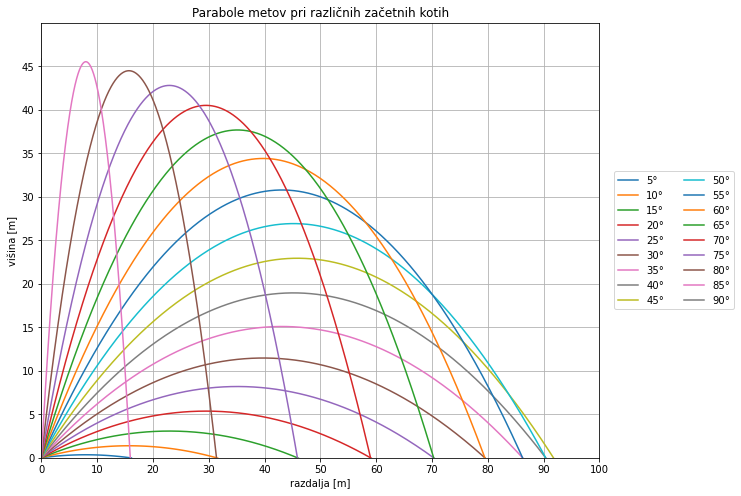

In [ ]:
# začetna hitrost meta
v_0 = 30 #m/s
# začetni kot meta
kot_deg = 45 # degrees

# array različnih kotov meta v stopinjah
koti_meta_deg = np.arange(5,95,5)

# naredimo časovne točke za 50 sekund, z razdelki po 10 ms
time_array = np.arange(0, 50, 0.01)
print('Številko časovnih točk ', len(time_array))

print(f'izračun trajektorij za naslednje kote meta \n {koti_meta_deg}')

data = np.array([])
# ustvarimo graf z definirano velikostjo
fig, ax = plt.subplots(figsize=(10,8))

for kot_deg in koti_meta_deg:

    t_array = []
    x_array = []
    y_array = []

    for dt in time_array:

        kot_rad = np.deg2rad(kot_deg)
        x = ((v_0*dt)*np.cos(kot_rad)) # get positions at every point in time
        y = ((v_0*dt)*np.sin(kot_rad))-((0.5*g)*(dt**2))

        t_array = np.append(t_array, dt)
        x_array = np.append(x_array, x)
        y_array = np.append(y_array, y)

        # data.append([dt, x, y])
        # pazimo da krogla ne pade skozi tla
        if y<0:
            break

    # nariši podatke na graf
    ax.plot(x_array, y_array, label = f'{kot_deg}°') # Plot for every angle

# pozicija legende
plt.legend(loc="center right", bbox_to_anchor=(1.25, 0.5), ncol = 2) # Plot for every angle
# naslov grafa
plt.title('Parabole metov pri različnih začetnih kotih')
# naslov osi
plt.xlabel('razdalja [m]')
plt.ylabel('višina [m]')
# številke na oseh
x_ticks = np.arange(0,110,10)
y_ticks = np.arange(0,50,5)
plt.xticks(x_ticks)
plt.yticks(y_ticks)
# enable grid
plt.grid(True)
# dolžina prikazanih osi
plt.xlim([0,100])
plt.ylim([0,50])
# prikaži graf
plt.show()

## Za vajo in zabavo

### VAJA 1
- najhitrejši met baseball žogice v zgodovini 46.0 m/s. Kako daleč bi ta žogica najdlje letela?
- rezultat grafa shrani v sliko

### VAJA 2 
- najdaljši met žogice v zgodovini je 135.89 metrov. Kakšna je začetna hitrost meta? sklepaj da je bil vržen pod optimalnim kotom.
- rezultat grafa shrani v sliko

### VAJA 3
- Povprečna oseba vrže žogico s hitrostjo 22 m/s. Za primerjavo na graf nariši met povprečne osebe (z modro) in profesinalnega metalca 38 m/s (z rdečo). Graf naj ima imena osi, legendo,...
- rezultat grafa shrani v sliko